Welcome to this notebook !!

The main objective of this project is to determine wheter or not the patients who have scheduled appointments for radiological service will attend

We use demographic data of the patients, which have been previously anonymized and internal data from the hospital.

Let us start this beautiful journey.

#Librerias Necesarias

In [2]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#from yellowbrick.classifier import ClassificationReport
#from yellowbrick.classifier import ClassPredictionError

# Cargar PATDATA - Base de datos de citas


In [74]:
#Load scheduling data supplied by the service

data=pd.read_excel('db_Citas_RM.XLSX')

In [75]:
pd.set_option('display.max_columns', None)
data['Edad'] = data['Edad'].round().astype(int)

data.head(5)

,Fecha,Hora,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,Tiempo entre creación cita y cita,Agente Cita,Confirmado por email,Paciente NO ubicado,Confirmado FAMILIAR,Confirmado PACIENTE,Confirmado,Antecedente No Show,Antecedente Cita Asistida,Antecedente Cita Cancelada,Estudio Simple,Parte del Cuerpo,Anestesia,Reprogramación,Reprogramación por paciente,Cita adelantada,Aseguradora,Voluntario,RS / RC,Tipo de Cita VARIABLE OBJETIVO
0,2018-01-02,08:30:00,8,martes,1,6 - 12,0,1,2,2017-11-01,62,PGRISALES,0,0,0,0,0,0,0,0,1,CEREBRO,1,1,1,0,EPS,Obligatorio,RC,ATENDIDA
1,2018-01-02,16:05:00,16,martes,1,12 - 18,0,2,54,2018-01-02,0,PGRISALES,0,0,0,0,0,0,0,0,1,MMII,0,0,0,0,PREPAGADA,Voluntario,RC,ATENDIDA
2,2018-01-02,17:15:00,17,martes,1,12 - 18,0,3,17,2017-12-18,15,SGALARZA,0,0,1,0,1,0,0,0,1,COLUMNA,0,0,0,0,PREPAGADA,Voluntario,RC,ATENDIDA
3,2018-01-02,11:25:00,11,martes,1,6 - 12,0,4,56,2018-01-02,0,SGALARZA,0,0,0,0,0,0,0,0,1,MMSS,0,0,0,0,OTRO,Voluntario,OT,ATENDIDA
4,2018-01-02,10:50:00,10,martes,1,6 - 12,0,5,30,2017-12-29,4,YGARAY,0,0,0,0,0,0,0,0,1,COLUMNA,0,0,0,0,PÓLIZA,Voluntario,RC,ATENDIDA


In [76]:
# We delete some columns that do not add value. Column confirmado is the sum of the previous 

data= data.drop(columns=['Fecha', 'Hora','Agente Cita','Fecha crea. cita','Confirmado por email','Paciente NO ubicado','Confirmado FAMILIAR','Confirmado PACIENTE'])
data.head(5)

,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Tiempo entre creación cita y cita,Confirmado,Antecedente No Show,Antecedente Cita Asistida,Antecedente Cita Cancelada,Estudio Simple,Parte del Cuerpo,Anestesia,Reprogramación,Reprogramación por paciente,Cita adelantada,Aseguradora,Voluntario,RS / RC,Tipo de Cita VARIABLE OBJETIVO
0,8,martes,1,6 - 12,0,1,2,62,0,0,0,0,1,CEREBRO,1,1,1,0,EPS,Obligatorio,RC,ATENDIDA
1,16,martes,1,12 - 18,0,2,54,0,0,0,0,0,1,MMII,0,0,0,0,PREPAGADA,Voluntario,RC,ATENDIDA
2,17,martes,1,12 - 18,0,3,17,15,1,0,0,0,1,COLUMNA,0,0,0,0,PREPAGADA,Voluntario,RC,ATENDIDA
3,11,martes,1,6 - 12,0,4,56,0,0,0,0,0,1,MMSS,0,0,0,0,OTRO,Voluntario,OT,ATENDIDA
4,10,martes,1,6 - 12,0,5,30,4,0,0,0,0,1,COLUMNA,0,0,0,0,PÓLIZA,Voluntario,RC,ATENDIDA


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29169 entries, 0 to 29168
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Hora.1                             29169 non-null  int64 
 1   Día de la semana                   29169 non-null  object
 2   Horario laboral 
(Si = 1; No = 0)  29169 non-null  int64 
 3   Franja horaria                     29169 non-null  object
 4   Día festivo                        29169 non-null  int64 
 5   Num Dcto Modif                     29169 non-null  int64 
 6   Edad                               29169 non-null  int32 
 7   Tiempo entre creación cita y cita  29169 non-null  int64 
 8   Confirmado                         29169 non-null  int64 
 9   Antecedente No Show                29169 non-null  int64 
 10  Antecedente Cita Asistida          29169 non-null  int64 
 11  Antecedente Cita Cancelada         29169 non-null  int64 
 12  Estu

In [78]:
columnas=['RS / RC', 'Aseguradora', 'Voluntario']
for columna in columnas:
  moda = data[columna].mode()[0]
  data[columna].fillna(moda, inplace=True)

In [79]:
data.head(84)

,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Tiempo entre creación cita y cita,Confirmado,Antecedente No Show,Antecedente Cita Asistida,Antecedente Cita Cancelada,Estudio Simple,Parte del Cuerpo,Anestesia,Reprogramación,Reprogramación por paciente,Cita adelantada,Aseguradora,Voluntario,RS / RC,Tipo de Cita VARIABLE OBJETIVO
0,8,martes,1,6 - 12,0,1,2,62,0,0,0,0,1,CEREBRO,1,1,1,0,EPS,Obligatorio,RC,ATENDIDA
1,16,martes,1,12 - 18,0,2,54,0,0,0,0,0,1,MMII,0,0,0,0,PREPAGADA,Voluntario,RC,ATENDIDA
2,17,martes,1,12 - 18,0,3,17,15,1,0,0,0,1,COLUMNA,0,0,0,0,PREPAGADA,Voluntario,RC,ATENDIDA
3,11,martes,1,6 - 12,0,4,56,0,0,0,0,0,1,MMSS,0,0,0,0,OTRO,Voluntario,OT,ATENDIDA
4,10,martes,1,6 - 12,0,5,30,4,0,0,0,0,1,COLUMNA,0,0,0,0,PÓLIZA,Voluntario,RC,ATENDIDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,8,jueves,1,6 - 12,0,80,2,24,0,0,0,0,1,COLUMNA,1,0,0,0,EPS,Obligatorio,RC,ATENDIDA
80,11,jueves,1,6 - 12,0,56,37,1,0,0,0,0,1,MMII,0,0,0,0,EPS,Voluntario,RC,CANCELADA
81,8,jueves,1,6 - 12,0,81,15,13,0,0,0,0,1,MMII,1,0,0,0,EPS,Obligatorio,RC,CANCELADA
82,12,viernes,1,12 - 18,0,82,72,3,1,0,0,0,1,CEREBRO,0,0,0,0,PREPAGADA,Voluntario,RC,ATENDIDA


In [20]:
#use label encoder from sklearn to encode categorical values

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Día de la semana', 'Franja horaria', 'Parte del Cuerpo', 'Aseguradora', 'Voluntario', 'RS / RC','Tipo de Cita VARIABLE OBJETIVO']  

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column in the list
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])
    print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'domingo': 0, 'jueves': 1, 'lunes': 2, 'martes': 3, 'miércoles': 4, 'sábado': 5, 'viernes': 6}
{'0 - 6': 0, '12 - 18': 1, '18 - 00': 2, '6 - 12': 3}
{'ABDOMEN': 0, 'CEREBRO': 1, 'COLUMNA': 2, 'CORAZON': 3, 'MAMA': 4, 'MMII': 5, 'MMSS': 6, 'OTRO': 7, 'PELVIS': 8, 'PROSTATA': 9}
{'ENTIDAD PRIVADA ': 0, 'EPS': 1, 'OTRO': 2, 'PARTICULAR': 3, 'PREPAGADA': 4, 'PÓLIZA': 5, 'PÓLIZA ': 6, 'REGIMEN ESPECIAL': 7, 'REGIMEN ESPECIAL ': 8, 'SOAT': 9, nan: 10}
{'Obligatorio': 0, 'Voluntario': 1, nan: 2}
{'OT': 0, 'RC': 1, 'RS': 2, nan: 3}
{'ASIGNADA': 0, 'ATENDIDA': 1, 'CANCELADA': 2}


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29169 entries, 0 to 29168
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Hora.1                             29169 non-null  int64 
 1   Día de la semana                   29169 non-null  object
 2   Horario laboral 
(Si = 1; No = 0)  29169 non-null  int64 
 3   Franja horaria                     29169 non-null  object
 4   Día festivo                        29169 non-null  int64 
 5   Num Dcto Modif                     29169 non-null  int64 
 6   Edad                               29169 non-null  int32 
 7   Tiempo entre creación cita y cita  29169 non-null  int64 
 8   Confirmado                         29169 non-null  int64 
 9   Antecedente No Show                29169 non-null  int64 
 10  Antecedente Cita Asistida          29169 non-null  int64 
 11  Antecedente Cita Cancelada         29169 non-null  int64 
 12  Estu

In [26]:
# checking the statistical insights 
data.describe()

,Hora.1,Horario laboral \n(Si = 1; No = 0),Día festivo,Num Dcto Modif,Edad,Tiempo entre creación cita y cita,Confirmado,Antecedente No Show,Antecedente Cita Asistida,Antecedente Cita Cancelada,Estudio Simple,Anestesia,Reprogramación,Reprogramación por paciente,Cita adelantada
count,29169.00000,29169.000000,29169.000000,29169.000000,29169.000000,29169.000000,29169.000000,29169.000000,29169.000000,29169.000000,29169.000000,29169.000000,29169.000000,29169.000000,29169.000000
mean,12.62203,0.623162,0.028832,10216.068463,49.256917,12.004148,0.526312,0.066406,0.235627,0.057870,0.426686,0.052761,0.141932,0.075285,0.008776
std,4.51736,0.484602,0.167337,6289.276246,19.106165,16.505151,0.499316,0.283746,0.590005,0.301095,0.494604,0.223561,0.348986,0.263856,0.093272
min,0.00000,0.000000,0.000000,1.000000,0.000000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.00000,0.000000,0.000000,4683.000000,36.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.00000,1.000000,0.000000,9908.000000,52.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.00000,1.000000,0.000000,15566.000000,63.000000,15.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,23.00000,1.000000,1.000000,21793.000000,99.000000,1309.000000,1.000000,5.000000,9.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


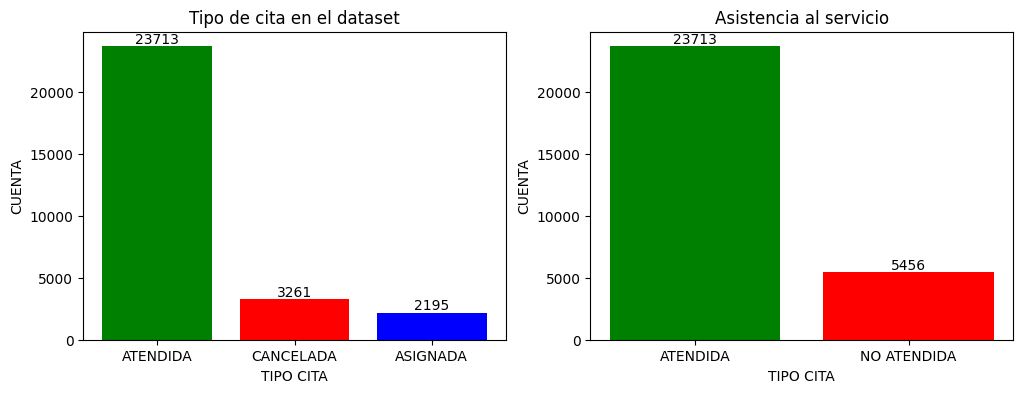

In [38]:
#We consider that both the classes asignada and cancelada represent a missed appointment 
#Here we create a graphic to determine how severe is the difference between classes

gender_counts = data['Tipo de Cita VARIABLE OBJETIVO'].value_counts()
gender_counts.index = ['ATENDIDA', 'CANCELADA', 'ASIGNADA']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(gender_counts.index, gender_counts.values, color=['green', 'red', 'blue'])

for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel('TIPO CITA')
plt.ylabel('CUENTA')
plt.title('Tipo de cita en el dataset')
#plt.show()

combi= gender_counts.values
combi[1]=combi[1]+combi[2]
combi=np.delete(combi,2,0)

combina= ['ATENDIDA', 'NO ATENDIDA']
plt.subplot(1, 2, 2)
plt.bar(combina, combi, color=['green', 'red'])

for i, count in enumerate(combi):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel('TIPO CITA')
plt.ylabel('CUENTA')
plt.title('Asistencia al servicio')
plt.show()

Here we notice that one of the challenges we have to address is the class imbalance
We will try 3 techniques that have demostrated to help when it comes to handel imbalanced data: Oversampling and undersampling 
SMOTE should be used after train/test split to avoid data leakage and over-optimistic performance evaluations 

# Cargar datos demográficos - Base de datos pacientes (información sociodemográfica y comunas de barrios)



In [39]:
# Load demographic info

data2=pd.read_excel('db_Citas_RM_patdata.XLSX')

In [40]:
data2.head()

,Num Dcto Modif,Fecha de nacimiento,Sexo,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Codigo aseguradora,Seguridad social,Régimen salud,Cotizante o beneficiario
0,348,1964-07-21,Masculino,NaN,NaN,NaN,VALLE DEL CAUCA,CALI,NaN,Particular,Particular,Particular,NaN
1,10037,1927-03-18,Masculino,NaN,NaN,NaN,VALLE DEL CAUCA,CALI,NaN,Particular,Particular,Particular,NaN
2,11779,1932-01-06,Masculino,NingunoAnterior,5.0,19.0,VALLE DEL CAUCA,CALI,PAMPA LINDA,1000000237,Coomeva Mp S.A. Oro,Emp Medicina Prepagada,Ampar plan volun sal
3,12679,1933-09-02,Masculino,Otro,6.0,22.0,VALLE DEL CAUCA,CALI,CLUB CAMPESTRE,1000000345,Compañia Seguros Bolivar S.A.,Aseguradoras,Ampar plan volun sal
4,18080,1932-09-15,Masculino,NaN,6.0,22.0,VALLE DEL CAUCA,CALI,PARCELACIONES PANCE,1000000164,Colsanitas Mp S.A,Emp Medicina Prepagada,Ampar plan volun sal


In [41]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21793 entries, 0 to 21792
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Num Dcto Modif            21793 non-null  int64         
 1   Fecha de nacimiento       21771 non-null  datetime64[ns]
 2   Sexo                      21771 non-null  object        
 3   Grupo étnico              3277 non-null   object        
 4   Estrato socioeconómico    17980 non-null  float64       
 5   Comuna                    17997 non-null  float64       
 6   Municipio de residencia   21609 non-null  object        
 7   Ciudad de residencia      21647 non-null  object        
 8   Barrio de residencia      17999 non-null  object        
 9   Codigo aseguradora        21628 non-null  object        
 10  Seguridad social          21628 non-null  object        
 11  Régimen salud             21628 non-null  object        
 12  Cotizante o benefi

In [ ]:
#We merge the databases using the shared column called 'Num Dcto Modif'

df = pd.merge(data, data2, on='Num Dcto Modif', how='inner')
df.head()
df.to_csv('df.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29171 entries, 0 to 29170
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Fecha                              29171 non-null  datetime64[ns]
 1   Hora                               29171 non-null  object        
 2   Hora.1                             29171 non-null  int64         
 3   Día de la semana                   29171 non-null  object        
 4   Horario laboral 
(Si = 1; No = 0)  29171 non-null  int64         
 5   Franja horaria                     29171 non-null  object        
 6   Día festivo                        29171 non-null  int64         
 7   Num Dcto Modif                     29171 non-null  int64         
 8   Edad                               29171 non-null  float64       
 9   Fecha crea. cita                   29171 non-null  datetime64[ns]
 10  Tiempo entre creación cita y cita 

Here we noticed that there are missing data, which could affect the performance of our ML model

In [ ]:
# Complete missing values with mode
columnas=['Seguridad social', 'Régimen salud', 'Cotizante o beneficiario','RS / RC', 'Aseguradora', 'Voluntario','Estrato socioeconómico','Comuna' ]
for columna in columnas:
  moda = df[columna].mode()[0]
  df[columna].fillna(moda, inplace=True)

df['Grupo étnico'].fillna('Otro', inplace=True)


# Completar valores faltantes en 'Municipio de residencia', 'Ciudad de residencia' y 'Barrio de residencia' con 'CALI'
df['Municipio de residencia'].fillna('CALI', inplace=True)
df['Ciudad de residencia'].fillna('CALI', inplace=True)
df['Barrio de residencia'].fillna('CALI', inplace=True)

# Verificar que los valores faltantes han sido llenados

In [ ]:
df['Tipo de Cita VARIABLE OBJETIVO'] = df['Tipo de Cita VARIABLE OBJETIVO'].replace({
    'ATENDIDA': 0,
    'ASIGNADA': 1,
    'CANCELADA': 1
})

In [ ]:
df['Franja horaria'] = df['Franja horaria'].replace({
    '6 - 12': 0,
    '12 - 18': 1,
    '18 - 00': 2,
    '0 - 6': 3
})

df['Día de la semana'] = df['Día de la semana'].replace({
    'lunes':0,
    'martes':1,
    'miércoles':2,
    'jueves':3,
    'viernes':4,
    'sábado':5,
    'domingo':6
})

In [ ]:
print(df['Día de la semana'])

0        1
1        1
2        1
3        1
4        1
        ..
29166    4
29167    4
29168    4
29169    4
29170    4
Name: Día de la semana, Length: 29171, dtype: int64


# Unificación de las bases de datos

In [ ]:
df.to_csv('df2.csv')

In [ ]:
final=df.drop(columns=['Codigo aseguradora', 'Fecha de nacimiento', 'Fecha', 'Hora','Agente Cita','Fecha crea. cita'])

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29171 entries, 0 to 29170
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hora.1                             29171 non-null  int64  
 1   Día de la semana                   29171 non-null  int64  
 2   Horario laboral 
(Si = 1; No = 0)  29171 non-null  int64  
 3   Franja horaria                     29171 non-null  int64  
 4   Día festivo                        29171 non-null  int64  
 5   Num Dcto Modif                     29171 non-null  int64  
 6   Edad                               29171 non-null  float64
 7   Tiempo entre creación cita y cita  29171 non-null  int64  
 8   Confirmado por email               29171 non-null  int64  
 9   Paciente NO ubicado                29171 non-null  int64  
 10  Confirmado FAMILIAR                29171 non-null  int64  
 11  Confirmado PACIENTE                29171 non-null  int

In [ ]:
mode_Sexo = df['Sexo'].mode()[0]
df['Sexo'].fillna(mode_Sexo, inplace=True)

In [ ]:
final=df

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29171 entries, 0 to 29170
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Fecha                              29171 non-null  datetime64[ns]
 1   Hora                               29171 non-null  object        
 2   Hora.1                             29171 non-null  int64         
 3   Día de la semana                   29171 non-null  int64         
 4   Horario laboral 
(Si = 1; No = 0)  29171 non-null  int64         
 5   Franja horaria                     29171 non-null  int64         
 6   Día festivo                        29171 non-null  int64         
 7   Num Dcto Modif                     29171 non-null  int64         
 8   Edad                               29171 non-null  float64       
 9   Fecha crea. cita                   29171 non-null  datetime64[ns]
 10  Tiempo entre creación cita y cita 

# Preprocesamiento para implementación de modelos

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = [
    'Parte del Cuerpo', 'Aseguradora', 'Voluntario', 'RS / RC',
    'Sexo', 'Grupo étnico', 'Municipio de residencia','Ciudad de residencia', 'Barrio de residencia',
    'Seguridad social', 'Régimen salud', 'Cotizante o beneficiario'
]

# Inicializar un diccionario para almacenar las subcategorías y sus valores numéricos
encoding_info = {}

# Codificar las columnas y almacenar la información de codificación
for column in columns_to_encode:
    le = LabelEncoder()
    final[column] = le.fit_transform(final[column])
    encoding_info[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Mostrar la información de codificación
for column, mapping in encoding_info.items():
    print(f"Codificación para la columna '{column}':")
    for category, code in mapping.items():
        print(f"  '{category}': {code}")
    print("\n")

Codificación para la columna 'Parte del Cuerpo':
  'ABDOMEN': 0
  'CEREBRO': 1
  'COLUMNA': 2
  'CORAZON': 3
  'MAMA': 4
  'MMII': 5
  'MMSS': 6
  'OTRO': 7
  'PELVIS': 8
  'PROSTATA': 9


Codificación para la columna 'Aseguradora':
  'ENTIDAD PRIVADA ': 0
  'EPS': 1
  'OTRO': 2
  'PARTICULAR': 3
  'PREPAGADA': 4
  'PÓLIZA': 5
  'PÓLIZA ': 6
  'REGIMEN ESPECIAL': 7
  'REGIMEN ESPECIAL ': 8
  'SOAT': 9


Codificación para la columna 'Voluntario':
  'Obligatorio': 0
  'Voluntario': 1


Codificación para la columna 'RS / RC':
  'OT': 0
  'RC': 1
  'RS': 2


Codificación para la columna 'Sexo':
  'Femenino': 0
  'Masculino': 1


Codificación para la columna 'Grupo étnico':
  'Afroamericano': 0
  'Caucásico': 1
  'Indígena': 2
  'Mestizo': 3
  'Mulato': 4
  'Negro': 5
  'NingunoAnterior': 6
  'Otro': 7


Codificación para la columna 'Municipio de residencia':
  'AMAZONAS': 0
  'ANTIOQUIA': 1
  'ARAUCA': 2
  'ATLANTICO': 3
  'ATLÁNTICO': 4
  'BOGOTÁ': 5
  'BOLIVAR': 6
  'BOLÍVAR': 7
  'CALDA

In [ ]:
final.head()

,Fecha,Hora,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,...,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Codigo aseguradora,Seguridad social,Régimen salud,Cotizante o beneficiario
0,2018-01-02,08:30:00,8,1,1,0,0,1,2.208219,2017-11-01,...,7,2.0,17.0,30,28,61,1000000330,157,7,8
1,2018-01-02,16:05:00,16,1,1,1,0,2,54.128767,2018-01-02,...,7,2.0,8.0,30,72,178,1000000237,62,4,0
2,2018-01-02,17:15:00,17,1,1,1,0,3,17.309589,2017-12-18,...,7,6.0,22.0,30,28,295,1000000308,182,1,0
3,2018-01-02,11:25:00,11,1,1,0,0,4,55.586301,2018-01-02,...,7,2.0,17.0,12,131,61,1000002089,0,11,12
4,2018-01-02,10:50:00,10,1,1,0,0,5,29.641096,2017-12-29,...,7,2.0,17.0,30,196,61,1000000316,178,0,12


In [ ]:
final.to_csv('df4.csv')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


# Supongamos que tu DataFrame se llama 'data' y las columnas de características y etiquetas son 'features' y 'labels'
X = final.drop('Tipo de Cita VARIABLE OBJETIVO', axis=1)  # Características
y = final['Tipo de Cita VARIABLE OBJETIVO']  # Etiquetas

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Aplicar el sobremuestreo solo al conjunto de entrenamiento
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Verificar el balance de clases después del sobremuestreo
print(y_train_resampled.value_counts())

# Ahora puedes usar X_train_resampled y y_train_resampled para entrenar tu modelo
# y X_test y y_test para evaluarlo

Tipo de Cita VARIABLE OBJETIVO
0    18976
1    18976
Name: count, dtype: int64


In [ ]:
    # Dividir el df en dos en función del genero
    sat = final[(final['Tipo de Cita VARIABLE OBJETIVO'] == 0)]
    nat = final[(final['Tipo de Cita VARIABLE OBJETIVO'] == 1)]

    # Ccalcular el # muestras para cada genero
    samples_per_genre = 5455

    # Muestra de cada dataframe, uno para 1 y otro para 0
    df_sampled_0 = sat.sample(samples_per_genre)
    df_sampled_1 = nat.sample(samples_per_genre)

    # concatenar los dos df para obtener el df final balanceado
    df_balanced = pd.concat([df_sampled_0, df_sampled_1])

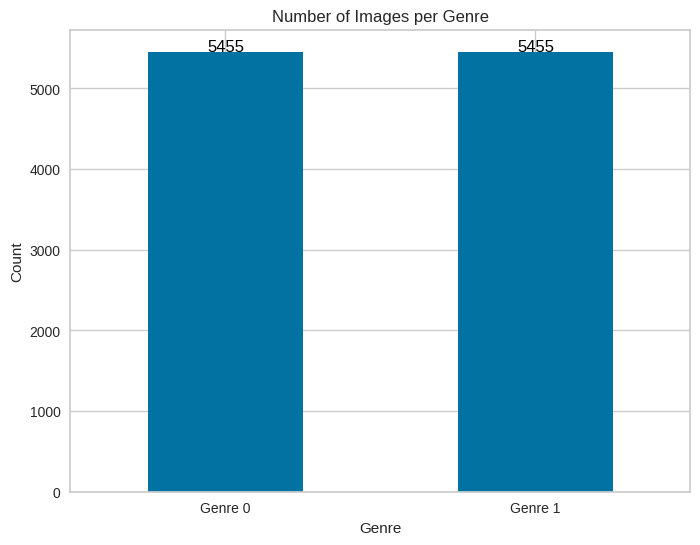

In [ ]:
#Visualizamos la distribucion de los datos para los subconjuntos
genre_counts = df_balanced['Tipo de Cita VARIABLE OBJETIVO'].value_counts()

# Crear un box plot
plt.figure(figsize=(8, 6))
ax=genre_counts.plot(kind='bar')
plt.title('Number of Images per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Genre 0', 'Genre 1'], rotation=0)

for i, v in enumerate(genre_counts):
    ax.text(i, v + 0.2, str(v), color='black', ha='center') #Mostrar  el valor numerico de cada barra

plt.show()


# Lectura Dataset




In [ ]:
# Reading data
data_df = df_balanced
#data_df = final
print(data_df.shape)
data_df.head()

(10910, 42)


,Fecha,Hora,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,...,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Codigo aseguradora,Seguridad social,Régimen salud,Cotizante o beneficiario
21489,2019-08-20,19:00:00,19,1,0,2,0,15260,56.797260,2019-08-05,...,7,5.0,2.0,30,28,201,1000000268,193,16,0
16983,2019-03-27,19:35:00,19,2,0,2,0,11708,50.013699,2019-03-22,...,7,5.0,19.0,30,28,126,1000000164,29,4,0
1644,2018-09-17,06:10:00,6,0,0,0,0,1016,13.410959,2018-08-27,...,7,2.0,15.0,30,28,129,1000000228,41,7,8
1500,2019-03-09,17:50:00,17,5,0,1,0,915,57.838356,2019-03-04,...,7,5.0,2.0,30,28,201,1000000290,48,16,12
24138,2019-11-18,12:00:00,12,0,1,1,0,17428,37.115068,2019-10-22,...,7,2.0,17.0,30,116,61,1000000266,199,7,4


In [ ]:
datos=data_df

#Exploración de Variables (EDA)

##Verificación de variables no nulas

In [ ]:
datos.info()
total = datos.isnull().sum().sort_values(ascending=False)
percent_1 = datos.isnull().sum()/datos.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(datos.size)

<class 'pandas.core.frame.DataFrame'>
Index: 10910 entries, 21489 to 10345
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Fecha                              10910 non-null  datetime64[ns]
 1   Hora                               10910 non-null  object        
 2   Hora.1                             10910 non-null  int64         
 3   Día de la semana                   10910 non-null  int64         
 4   Horario laboral 
(Si = 1; No = 0)  10910 non-null  int64         
 5   Franja horaria                     10910 non-null  int64         
 6   Día festivo                        10910 non-null  int64         
 7   Num Dcto Modif                     10910 non-null  int64         
 8   Edad                               10910 non-null  float64       
 9   Fecha crea. cita                   10910 non-null  datetime64[ns]
 10  Tiempo entre creación cita y cita  

,Total,%
Codigo aseguradora,162,1.5
Fecha de nacimiento,10,0.1
Fecha,0,0.0
Sexo,0,0.0
Reprogramación,0,0.0
Reprogramación por paciente,0,0.0
Cita adelantada,0,0.0
Aseguradora,0,0.0
Voluntario,0,0.0
RS / RC,0,0.0


In [ ]:
datos = datos.dropna()

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10748 entries, 21489 to 10345
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Fecha                              10748 non-null  datetime64[ns]
 1   Hora                               10748 non-null  object        
 2   Hora.1                             10748 non-null  int64         
 3   Día de la semana                   10748 non-null  int64         
 4   Horario laboral 
(Si = 1; No = 0)  10748 non-null  int64         
 5   Franja horaria                     10748 non-null  int64         
 6   Día festivo                        10748 non-null  int64         
 7   Num Dcto Modif                     10748 non-null  int64         
 8   Edad                               10748 non-null  float64       
 9   Fecha crea. cita                   10748 non-null  datetime64[ns]
 10  Tiempo entre creación cita y cita  

## Mapa de Calor: Correlación (variables numéricas)

In [ ]:
datosnum=datos._get_numeric_data()

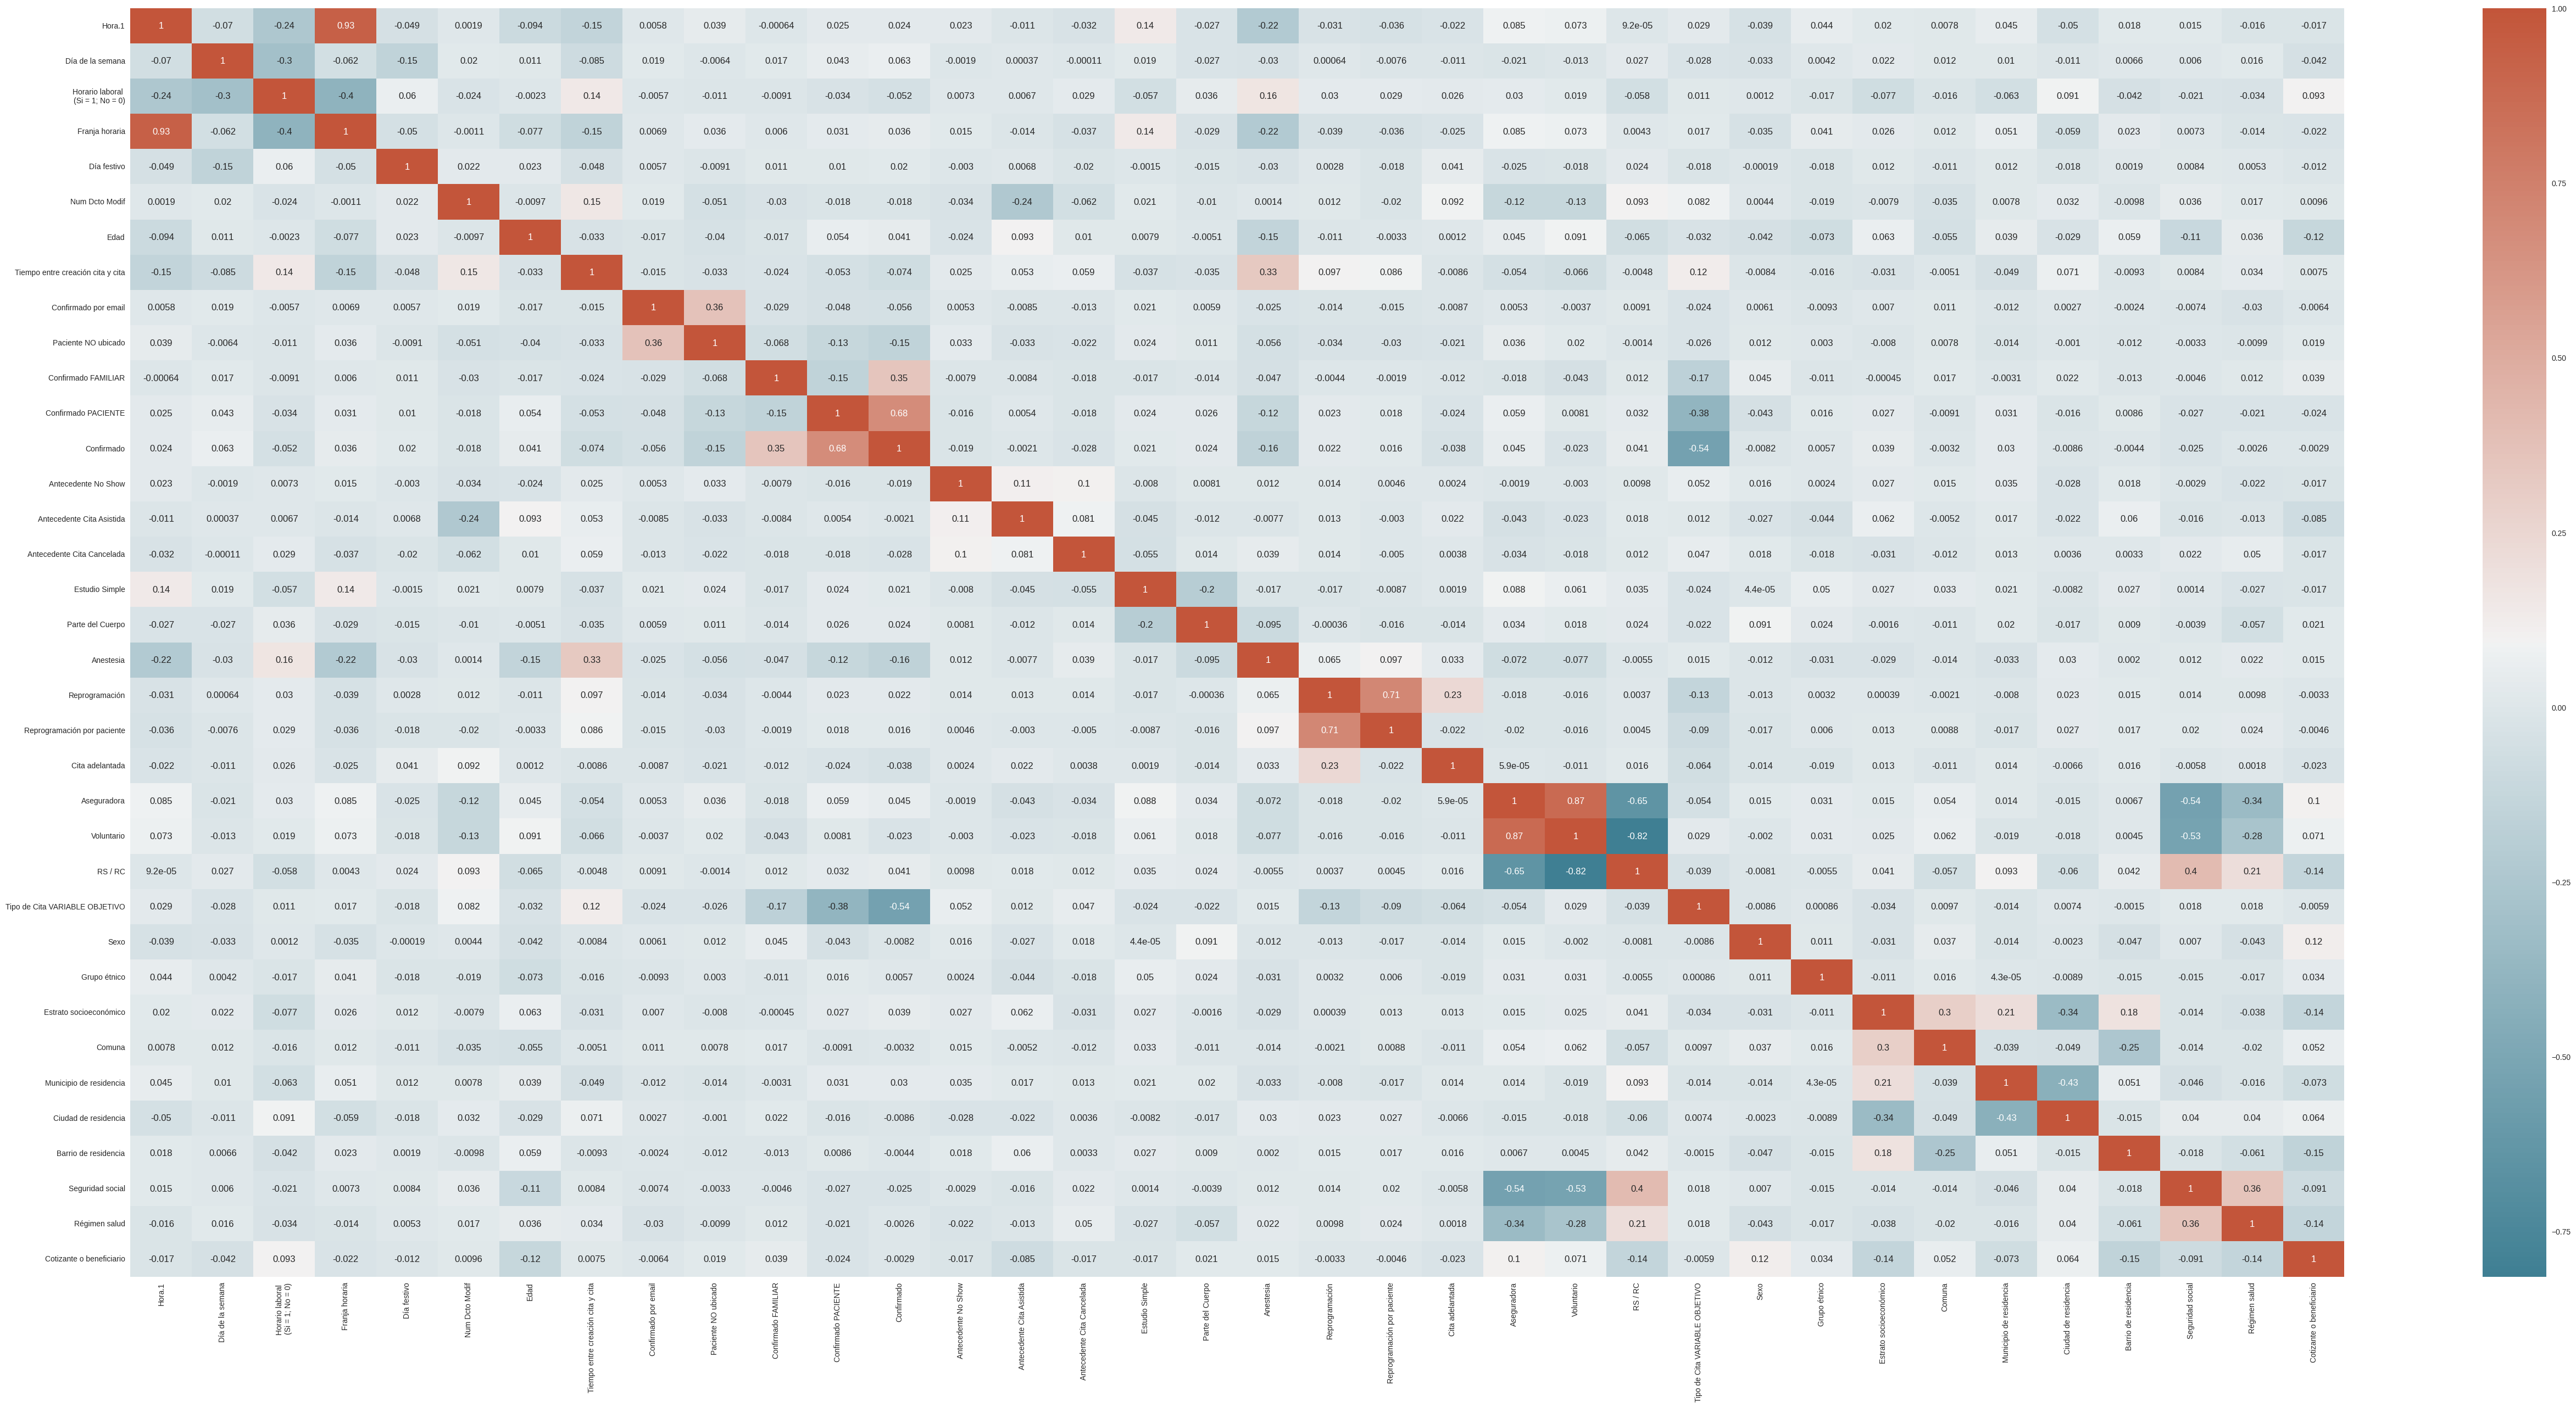

In [ ]:
corr = datosnum.corr()
plt.subplots(figsize=(65,30))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [ ]:
datosnum.describe()

,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Tiempo entre creación cita y cita,Confirmado por email,Paciente NO ubicado,...,Sexo,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Seguridad social,Régimen salud,Cotizante o beneficiario
count,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,...,10748.000000,10748.000000,10748.000000,10748.000000,10748.00000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000
mean,12.600484,2.697897,0.633885,0.736788,0.026796,10651.628582,49.069944,13.775679,0.010421,0.057964,...,0.434592,6.812709,3.318943,13.580666,28.83048,46.884723,209.699851,119.725996,6.471437,4.420729
std,4.511087,1.839520,0.481764,0.725480,0.161493,6361.612325,19.245831,21.510374,0.101553,0.233687,...,0.495726,0.885560,1.470743,5.936993,4.27897,40.293203,128.527442,65.333757,5.357597,5.278698
min,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.323288,-65.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,0.000000,0.000000,4995.250000,35.683562,4.000000,0.000000,0.000000,...,0.000000,7.000000,2.000000,8.000000,30.00000,28.000000,69.000000,62.000000,1.000000,0.000000
50%,13.000000,3.000000,1.000000,1.000000,0.000000,10537.000000,51.193151,9.000000,0.000000,0.000000,...,0.000000,7.000000,3.000000,17.000000,30.00000,28.000000,206.000000,140.000000,4.000000,0.000000
75%,16.000000,4.000000,1.000000,1.000000,0.000000,16243.250000,63.233562,17.000000,0.000000,0.000000,...,1.000000,7.000000,5.000000,17.000000,30.00000,31.000000,295.000000,182.000000,11.000000,12.000000
max,23.000000,6.000000,1.000000,2.000000,1.000000,21791.000000,98.558904,1309.000000,1.000000,1.000000,...,1.000000,7.000000,6.000000,22.000000,30.00000,197.000000,447.000000,216.000000,16.000000,17.000000


## Distribución de las Clases en el dataset

Rows, Columns: (10748, 42)
Tipo de Cita VARIABLE OBJETIVO
0    5451
1    5297
dtype: int64 [0 1] [5451 5297]


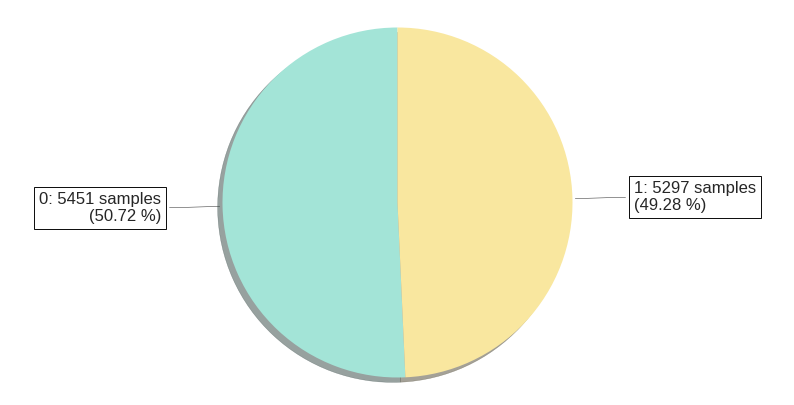

In [ ]:
print("Rows, Columns:",datos.shape)
Clases = datos.groupby('Tipo de Cita VARIABLE OBJETIVO').size()
labels = Clases.index.values
sizes = Clases.values
print(Clases,labels,sizes)
muestra = []

for k in range(0,labels.size):
  texto = str(labels[k])+': '+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)

colors = ['#A3E4D7','#F9E79F','#D5DBDB','#E6B0AA','#D7BDE2','#A9CCE3','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60','#A569BD','#C0392B','#138D75']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(10,5),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
# Separar variables independientes y etiquetas
X = datos.drop(['Tipo de Cita VARIABLE OBJETIVO'], axis=1)
y = datos['Tipo de Cita VARIABLE OBJETIVO']

# Sobremuestrear la clase minoritaria
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X, y)

# Crear un nuevo DataFrame con las variables independientes y etiquetas sobremuestreadas
datos_over = pd.concat([pd.DataFrame(X_over), pd.DataFrame(y_over, columns=['Tipo de Cita VARIABLE OBJETIVO'])], axis=1)

# Verificar que las clases estén balanceadas
print(datos_over['Tipo de Cita VARIABLE OBJETIVO'].value_counts())

Tipo de Cita VARIABLE OBJETIVO
0    5451
1    5451
Name: count, dtype: int64


#Preprocesamiento de Datos

###Definición de las caracteristicas (X) y la variable a estimar (Y)

In [ ]:
X = datos_over.drop(['Tipo de Cita VARIABLE OBJETIVO'], axis=1) #En el dataframe X quitamos la variable de respuesta "Label"
print(X.shape)

(10902, 41)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10902 entries, 0 to 10901
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Fecha                              10902 non-null  datetime64[ns]
 1   Hora                               10902 non-null  object        
 2   Hora.1                             10902 non-null  int64         
 3   Día de la semana                   10902 non-null  int64         
 4   Horario laboral 
(Si = 1; No = 0)  10902 non-null  int64         
 5   Franja horaria                     10902 non-null  int64         
 6   Día festivo                        10902 non-null  int64         
 7   Num Dcto Modif                     10902 non-null  int64         
 8   Edad                               10902 non-null  float64       
 9   Fecha crea. cita                   10902 non-null  datetime64[ns]
 10  Tiempo entre creación cita y cita 

In [ ]:
# prompt: elimina los datetime64 y los object de X

# Seleccionar columnas que no sean de tipo datetime64[ns] ni object
X = X.select_dtypes(exclude=['datetime64[ns]', 'object'])
print(X.shape)
X.info()


(10902, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10902 entries, 0 to 10901
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hora.1                             10902 non-null  int64  
 1   Día de la semana                   10902 non-null  int64  
 2   Horario laboral 
(Si = 1; No = 0)  10902 non-null  int64  
 3   Franja horaria                     10902 non-null  int64  
 4   Día festivo                        10902 non-null  int64  
 5   Num Dcto Modif                     10902 non-null  int64  
 6   Edad                               10902 non-null  float64
 7   Tiempo entre creación cita y cita  10902 non-null  int64  
 8   Confirmado por email               10902 non-null  int64  
 9   Paciente NO ubicado                10902 non-null  int64  
 10  Confirmado FAMILIAR                10902 non-null  int64  
 11  Confirmado PACIENTE                10902 n

In [ ]:
le = LabelEncoder()
Y = datos_over['Tipo de Cita VARIABLE OBJETIVO'].values.astype(str)
Y = le.fit_transform(Y)
print(Y.shape)
print("------------------------")
print(type(Y)) #Es un array
print("------------------------")
print(Y)

(10902,)
------------------------
<class 'numpy.ndarray'>
------------------------
[0 0 0 ... 1 1 1]


###Eliminación de Valores faltantes


In [ ]:
missing = (X.isnull().sum() / len(X)).sort_values(ascending = False)
missing = missing.index[missing > 0.7]
all_missing = list(set(missing))
print('Hay %d columnas con mas del 70%% de los datos vacios' % len(all_missing))

Hay 0 columnas con mas del 70% de los datos vacios


### Remover caracteristicas con varianza cero


In [ ]:
from sklearn.feature_selection import VarianceThreshold
v_thres = VarianceThreshold(threshold=0)
v_thres.fit(X)
Cols = X.columns[v_thres.get_support()]
X = v_thres.transform(X)
X = pd.DataFrame(X,columns=Cols)
X.shape

(10902, 35)

###Identificar y eliminar colinealidades (alta correlacion)

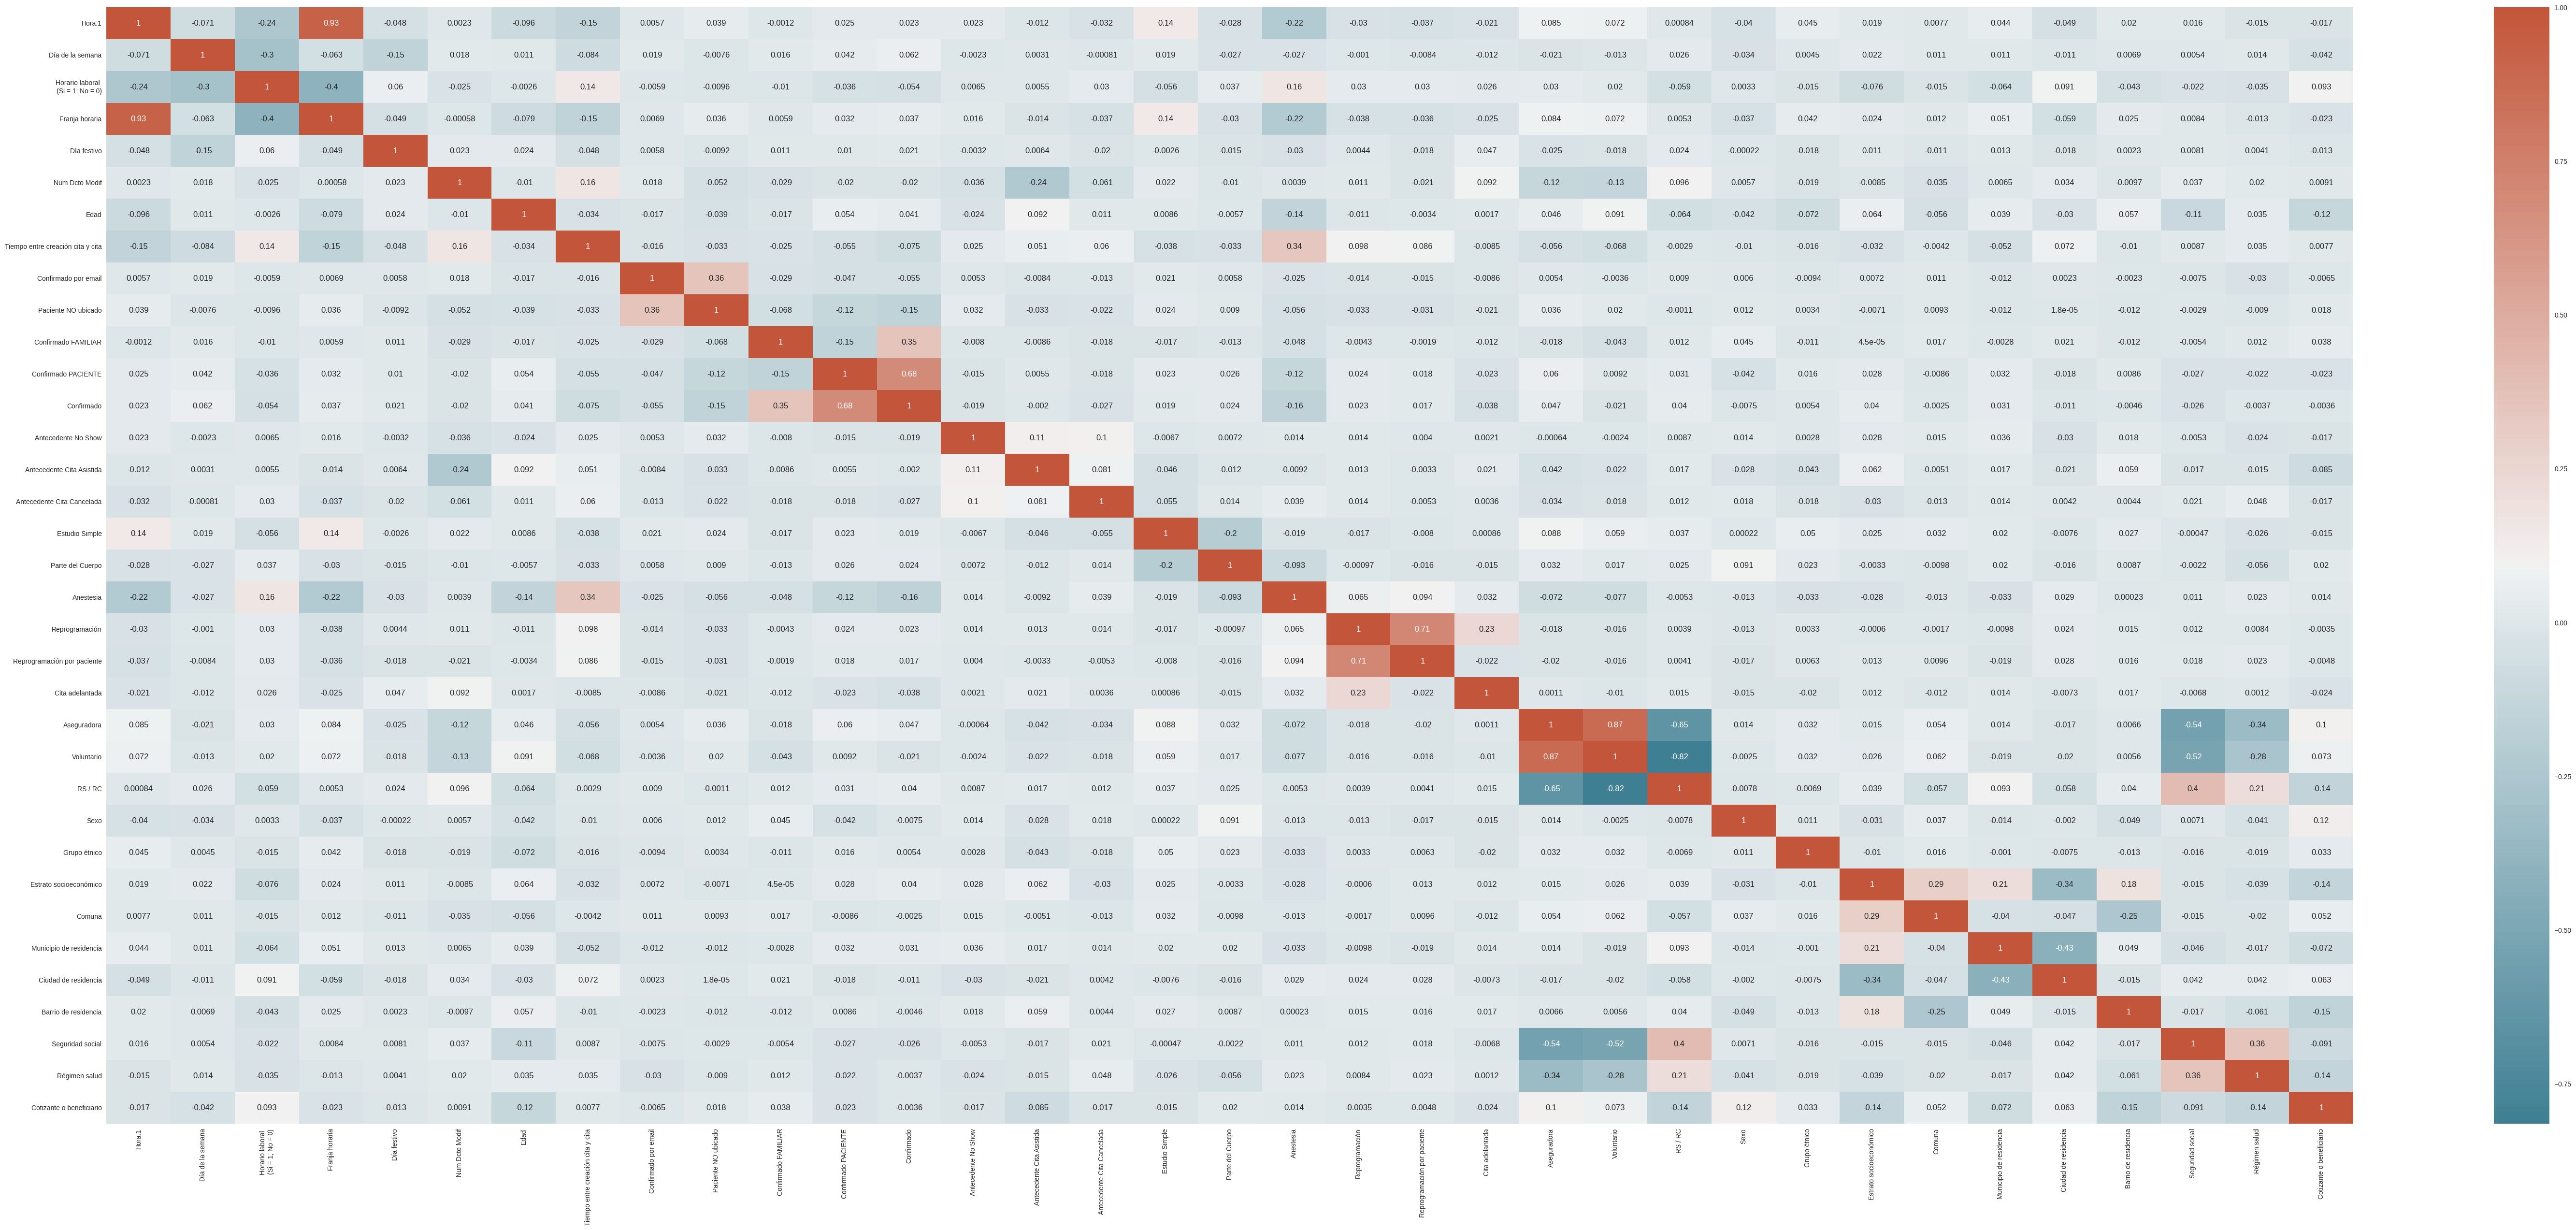

In [ ]:
corr = X.corr()
plt.subplots(figsize=(75,30))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [ ]:
#Threshold for removing correlated variables
threshold = abs(0.7)
# Absolute value correlation matrix
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#Select the colums with high threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('Hay %d columnas para remover.' % (len(to_drop)))
print(to_drop)


Hay 4 columnas para remover.
['Franja horaria', 'Reprogramación por paciente', 'Voluntario', 'RS / RC']


In [ ]:
X = X.drop(to_drop, axis=1)
print(X.shape)

(10902, 31)


In [ ]:
view = X.columns
print(view)

Index(['Hora.1', 'Día de la semana', 'Horario laboral \n(Si = 1; No = 0)',
       'Día festivo', 'Num Dcto Modif', 'Edad',
       'Tiempo entre creación cita y cita', 'Confirmado por email',
       'Paciente NO ubicado', 'Confirmado FAMILIAR', 'Confirmado PACIENTE',
       'Confirmado', 'Antecedente No Show', 'Antecedente Cita Asistida',
       'Antecedente Cita Cancelada', 'Estudio Simple', 'Parte del Cuerpo',
       'Anestesia', 'Reprogramación', 'Cita adelantada', 'Aseguradora', 'Sexo',
       'Grupo étnico', 'Estrato socioeconómico', 'Comuna',
       'Municipio de residencia', 'Ciudad de residencia',
       'Barrio de residencia', 'Seguridad social', 'Régimen salud',
       'Cotizante o beneficiario'],
      dtype='object')


In [ ]:
X = X.drop(['Num Dcto Modif', 'Confirmado PACIENTE',  'Grupo étnico'], axis=1)
view = X.columns
print(X.shape)


(10902, 28)


In [ ]:
Y_df= pd.DataFrame(Y, columns=['Tipo de Cita VARIABLE OBJETIVO'])

In [ ]:
concat_df = pd.concat([X, Y_df], axis=1)

In [ ]:
Y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10902 entries, 0 to 10901
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Tipo de Cita VARIABLE OBJETIVO  10902 non-null  int64
dtypes: int64(1)
memory usage: 85.3 KB


In [ ]:
#sns.pairplot(concat_df,hue='Tipo de Cita VARIABLE OBJETIVO',height=1.5)
#plt.show()

##Normalización

In [ ]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler1.fit(X)
X_n = scaler1.transform(X)
X_n = np.array(X_n)

##División del Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y, test_size = 0.2, stratify=Y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8721, 28)
(2181, 28)
(8721,)
(2181,)


#Métodos

##Método 1:  Percerptrón (Monocapa)

### Selección de Hiperparámetros

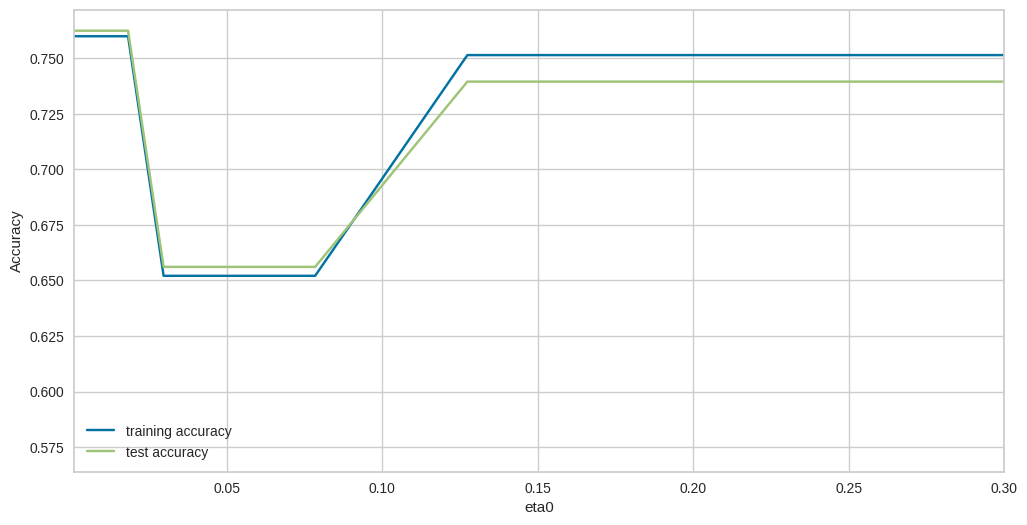

In [ ]:
training_accuracy = []
test_accuracy = []
eta0 = np.logspace(-3,1,20)
for eta in eta0:
    clf = Perceptron(max_iter=100, eta0=eta, random_state=42)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, Y_test))
fig, axe = plt.subplots(ncols=1,figsize=(12, 6))
plt.plot(eta0, training_accuracy, label="training accuracy")
plt.plot(eta0, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("eta0")
plt.xlim(0.001, 0.3)
plt.legend()
plt.show()

###Crear y Entrenar el perceptrón

In [ ]:
clf_per = Perceptron(max_iter=100, eta0=0.015, random_state=42)
clf_per.fit(X_train,Y_train.ravel())

Perceptron(eta0=0.015, max_iter=100, random_state=42)

### Prueba con datos de entrenamiento

Accuracy: 0.7600


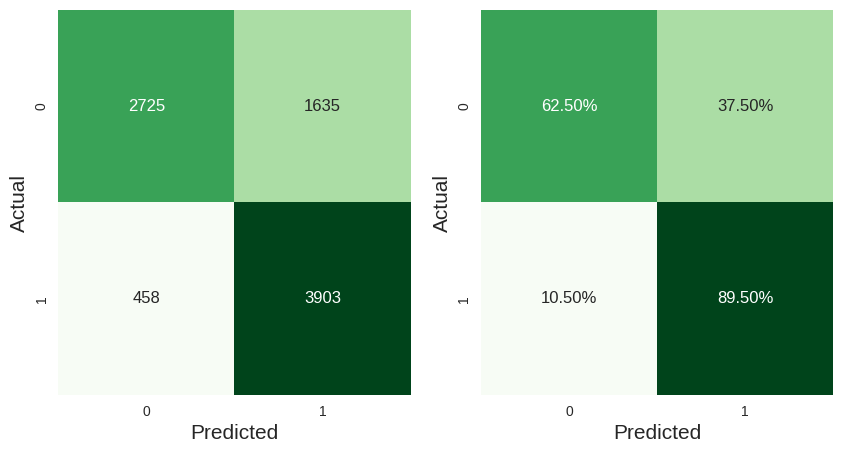

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_per = clf_per.predict(X_train)
print('Accuracy: %.4f' % accuracy_score(Y_train, y_pred_per))
sns.heatmap(confusion_matrix(Y_train, y_pred_per), fmt=".0f",
            annot=True, xticklabels=labels, yticklabels=labels,
            ax=ax[0], cbar=False, cmap="Greens")
sns.heatmap(confusion_matrix(Y_train, y_pred_per, normalize='true'), fmt=".2%",
            annot=True, xticklabels=labels, yticklabels=labels,
            ax=ax[1], cbar=False, cmap="Greens")
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

### Prueba con datos de validación

Accuracy: 0.7625


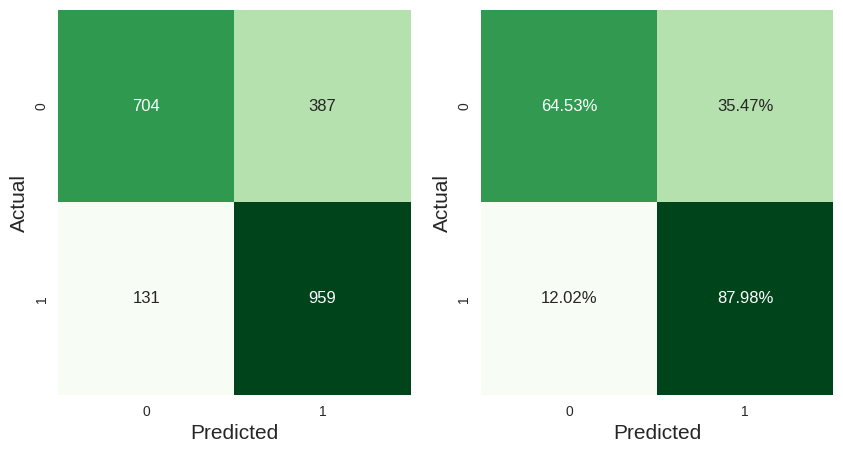

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_per = clf_per.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(Y_test, y_pred_per))
sns.heatmap(confusion_matrix(Y_test, y_pred_per), fmt=".0f",
            xticklabels=labels, yticklabels=labels, annot=True,
            ax=ax[0], cbar=False, cmap="Greens")
sns.heatmap(confusion_matrix(Y_test, y_pred_per, normalize='true'), fmt=".2%",
            annot=True, xticklabels=labels, yticklabels=labels,
            ax=ax[1], cbar=False, cmap="Greens")
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

## Método 2: Arboles de decisión

### Selección de Hiperparámetros

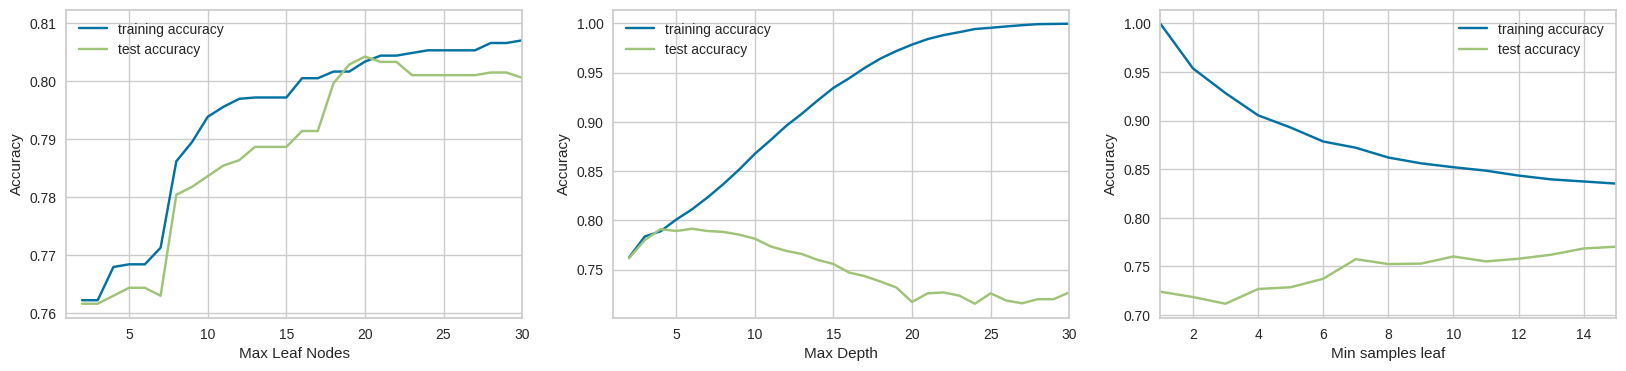

In [ ]:
training_accuracy_l1 = []
test_accuracy_l1 = []
max_leaf_nodes = range(2, 35, 1)
for leaf_nodes in max_leaf_nodes:
    # build the model
    clf = DecisionTreeClassifier(max_leaf_nodes=leaf_nodes, random_state=42)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l1.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l1.append(clf.score(X_test, Y_test))
training_accuracy_l2 = []
test_accuracy_l2 = []
max_depth = range(2, 31, 1)
for depth in max_depth:
    # build the model
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l2.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l2.append(clf.score(X_test, Y_test))
training_accuracy_l3 = []
test_accuracy_l3 = []
min_samples_leaf = range(1, 20, 1)
for samples_leaf in min_samples_leaf:
    # build the model
    clf = DecisionTreeClassifier(min_samples_leaf=samples_leaf,random_state=42)
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l3.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l3.append(clf.score(X_test, Y_test))
fig, axe = plt.subplots(ncols=3,figsize=(20, 4))
plt.subplot(1,3,1)
plt.plot(max_leaf_nodes, training_accuracy_l1, label="training accuracy")
plt.plot(max_leaf_nodes, test_accuracy_l1, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max Leaf Nodes")
plt.xlim(1, 30)
plt.legend()
plt.subplot(1,3,2)
plt.plot(max_depth, training_accuracy_l2, label="training accuracy")
plt.plot(max_depth, test_accuracy_l2, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.xlim(1, 30)
plt.legend()
plt.subplot(1,3,3)
plt.plot(min_samples_leaf, training_accuracy_l3, label="training accuracy")
plt.plot(min_samples_leaf, test_accuracy_l3, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Min samples leaf")
plt.xlim(1, 15)
plt.legend()
plt.show()

###Crear y Entrenar el Arbol de Decisión

In [ ]:
clf_DT =DecisionTreeClassifier(random_state=42,max_depth = 5)
clf_DT.fit(X_train,Y_train.ravel())

DecisionTreeClassifier(max_depth=5, random_state=42)

###Análisis del arbol de Decisión

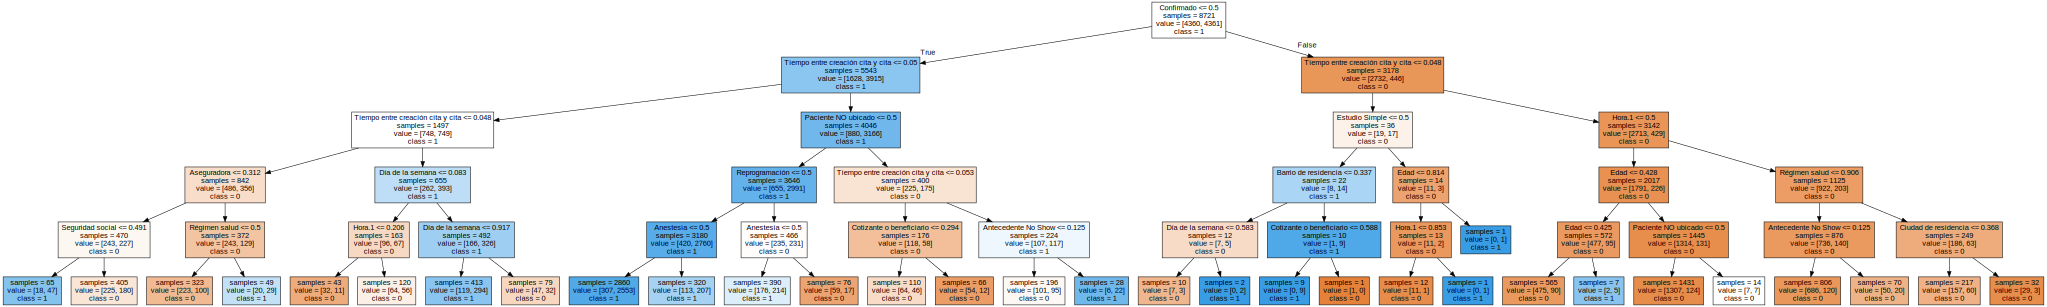

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(clf_DT, out_file = "arbol.dot", class_names=["0","1"],
                feature_names = view, impurity=False, filled=True)
with open("arbol.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

### Feature Importance

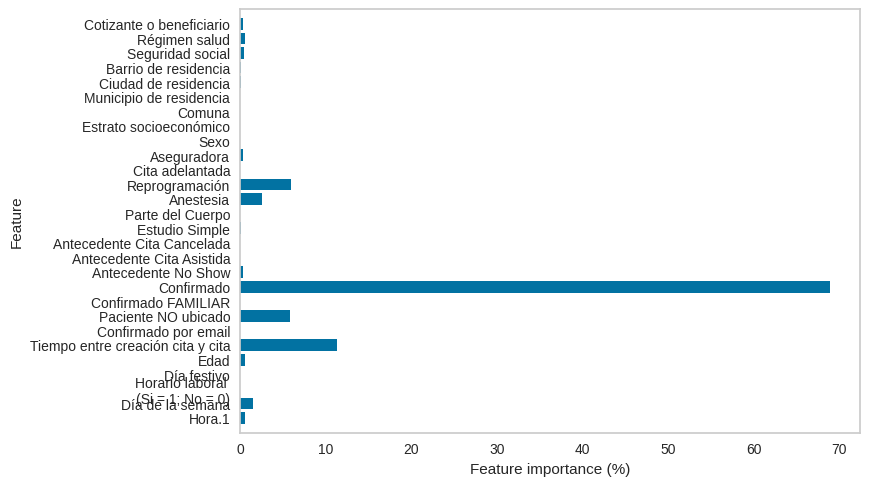

In [ ]:
n_features = view.shape[0]
plt.barh(range(n_features),clf_DT.feature_importances_*100, align='center')
plt.yticks(np.arange(n_features), view)
plt.xlabel("Feature importance (%)")
plt.ylabel("Feature")
plt.grid("")
plt.ylim(-1,n_features)
plt.show()

### Prueba con datos de entrenamiento

Accuracy: 0.80


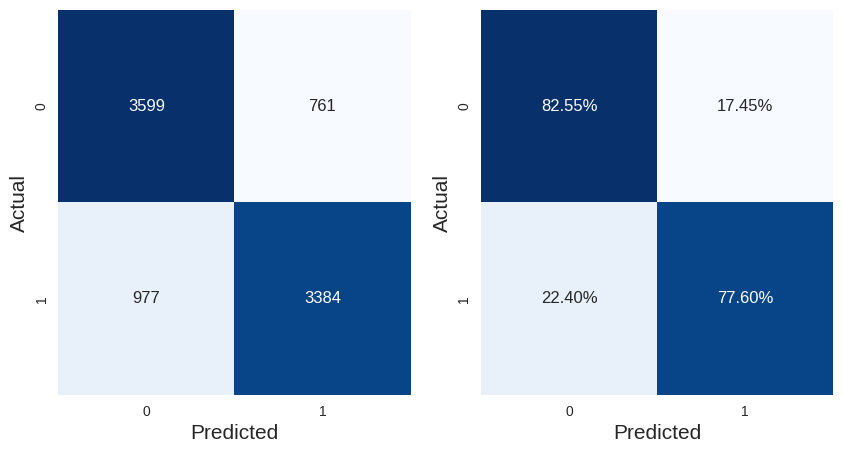

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_DT = clf_DT.predict(X_train)
print('Accuracy: %.2f' % accuracy_score(Y_train, y_pred_DT))
sns.heatmap(confusion_matrix(Y_train, y_pred_DT), fmt=".0f",
            annot=True, ax=ax[0], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Blues");
sns.heatmap(confusion_matrix(Y_train, y_pred_DT, normalize='true'), fmt=".2%",
            annot=True, ax=ax[1], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Blues");
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

### Prueba con datos de validación

Accuracy: 0.7891


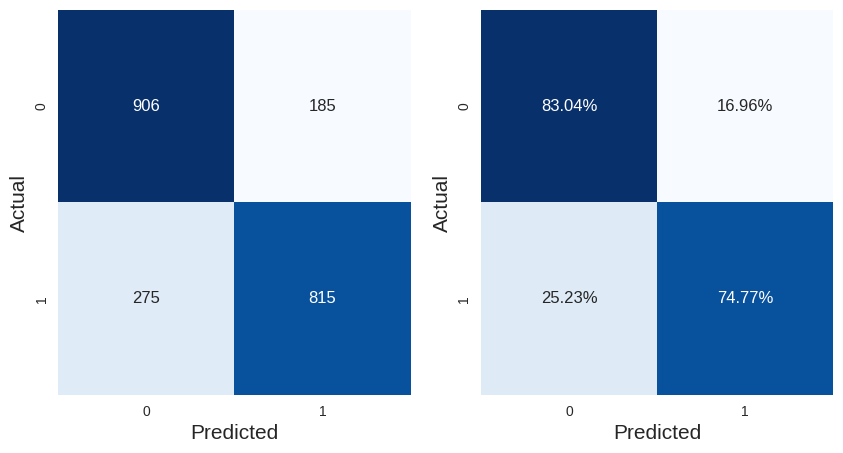

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
y_pred_DT = clf_DT.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(Y_test, y_pred_DT))
sns.heatmap(confusion_matrix(Y_test, y_pred_DT), fmt=".0f",
            annot=True, ax=ax[0],xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Blues");
sns.heatmap(confusion_matrix(Y_test, y_pred_DT, normalize='true'), fmt=".2%",
            annot=True, ax=ax[1],xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Blues");
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

## Método 3: Regresión Logística

### Selección de Hiperparámetros

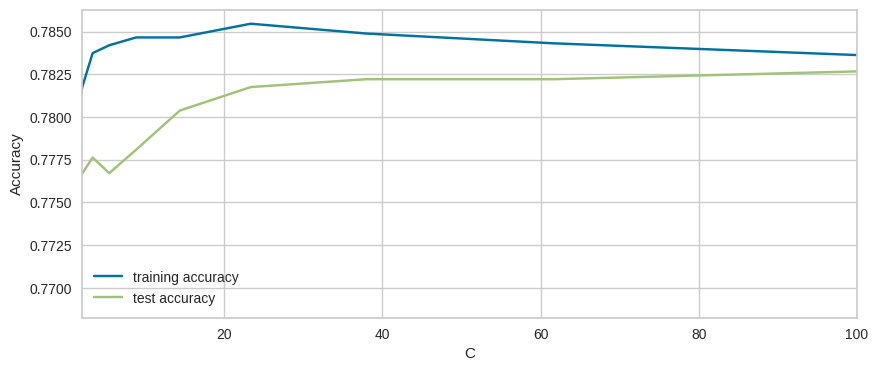

In [ ]:
training_accuracy_l = []
test_accuracy_l = []
C = np.logspace(-2,2,20)
for C_p in C:
    # build the model
    clf = LogisticRegression(C=C_p,random_state=42, solver='newton-cg')
    clf.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_l.append(clf.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy_l.append(clf.score(X_test, Y_test))
fig, axe = plt.subplots(ncols=1,figsize=(10, 4))
plt.plot(C, training_accuracy_l, label="training accuracy")
plt.plot(C, test_accuracy_l, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.xlim(2, 100)
plt.legend()
plt.show()

### Crear y entrenar la regresión logística

In [ ]:
clf_log = LogisticRegression(C=100, solver='newton-cg', random_state=42)
clf_log.fit(X_train, Y_train.ravel())

LogisticRegression(C=100, random_state=42, solver='newton-cg')

### Prueba con datos de entrenamiento

Accuracy: 0.7836


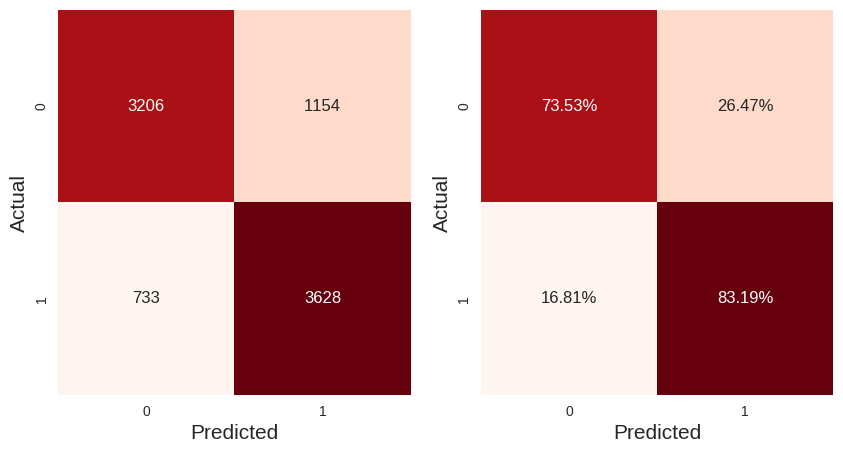

In [ ]:
# Apply the trained perceptron on the X data to make predicts for the y test data
y_pred_log = clf_log.predict(X_train)
print('Accuracy: %.4f' % accuracy_score(Y_train, y_pred_log))
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
sns.heatmap(confusion_matrix(Y_train, y_pred_log), fmt=".0f",
            annot=True, ax=ax[0], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Reds");
sns.heatmap(confusion_matrix(Y_train, y_pred_log, normalize='true'), fmt=".2%",
            annot=True, ax=ax[1], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Reds");
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

###Prueba con datos de validación

Accuracy: 0.7827


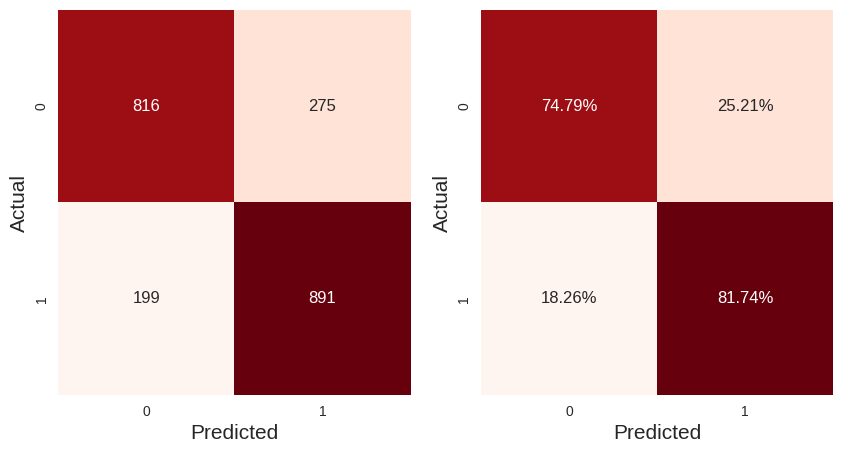

In [ ]:
y_pred_log = clf_log.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(Y_test, y_pred_log))
fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1)
sns.heatmap(confusion_matrix(Y_test, y_pred_log), fmt=".0f",
            annot=True, ax=ax[0], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Reds")
sns.heatmap(confusion_matrix(Y_test, y_pred_log, normalize='true'), fmt=".2%",
            annot=True, ax=ax[1], xticklabels=labels, yticklabels=labels,
            cbar=False, cmap="Reds")
ax[0].set_xlabel('Predicted', fontsize = 15)
ax[0].set_ylabel('Actual', fontsize = 15)
ax[1].set_xlabel('Predicted', fontsize = 15)
ax[1].set_ylabel('Actual', fontsize = 15)
fig.show()

# Algunas Visualizaciones de métricas

In [ ]:
# Specify the target classes
classes = list(Clases.index)
# select classifiers
classifiers=[clf_per, clf_DT, clf_log]

## Classification Report

### Datos de entrenamiento

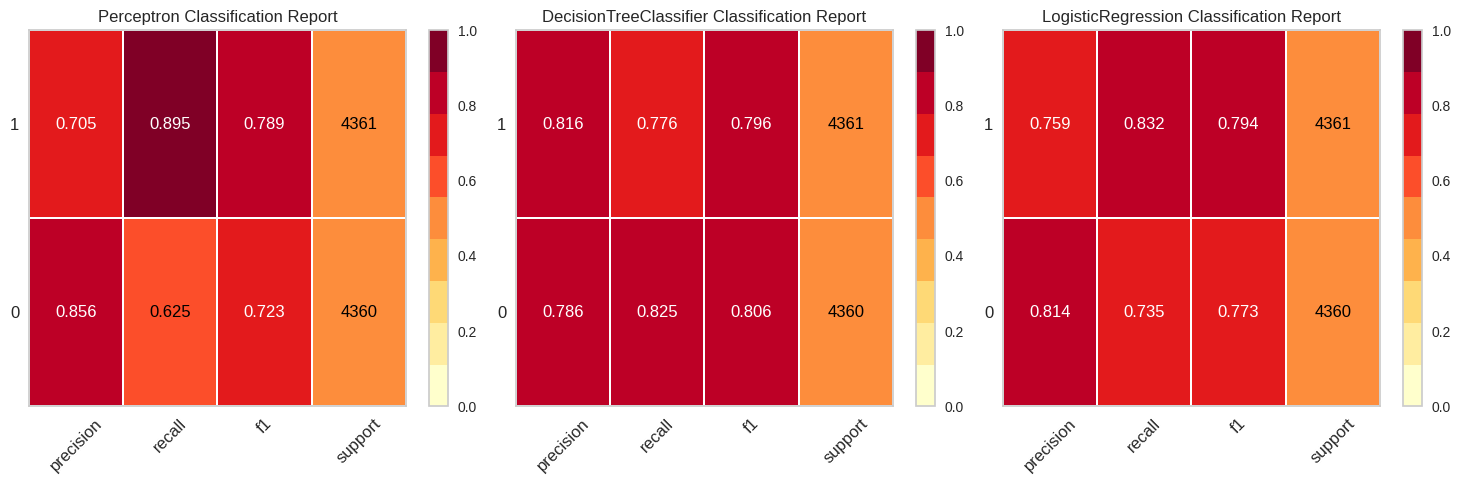

In [ ]:
fig, axe = plt.subplots(ncols=3,nrows=1,figsize=(15, 5))
fig.tight_layout(pad=8.0)
visualgrid = [ClassificationReport(classifiers[0], classes=classes, support=True, force_model=True, ax=axe[0]),
              ClassificationReport(classifiers[1], classes=classes, support=True,ax=axe[1]),
              ClassificationReport(classifiers[2], classes=classes, support=True,ax=axe[2])]
for viz in visualgrid:
  viz.fit(X_train, Y_train)
  viz.score(X_train, Y_train)
  viz.finalize()
fig.show()

### Datos de prueba

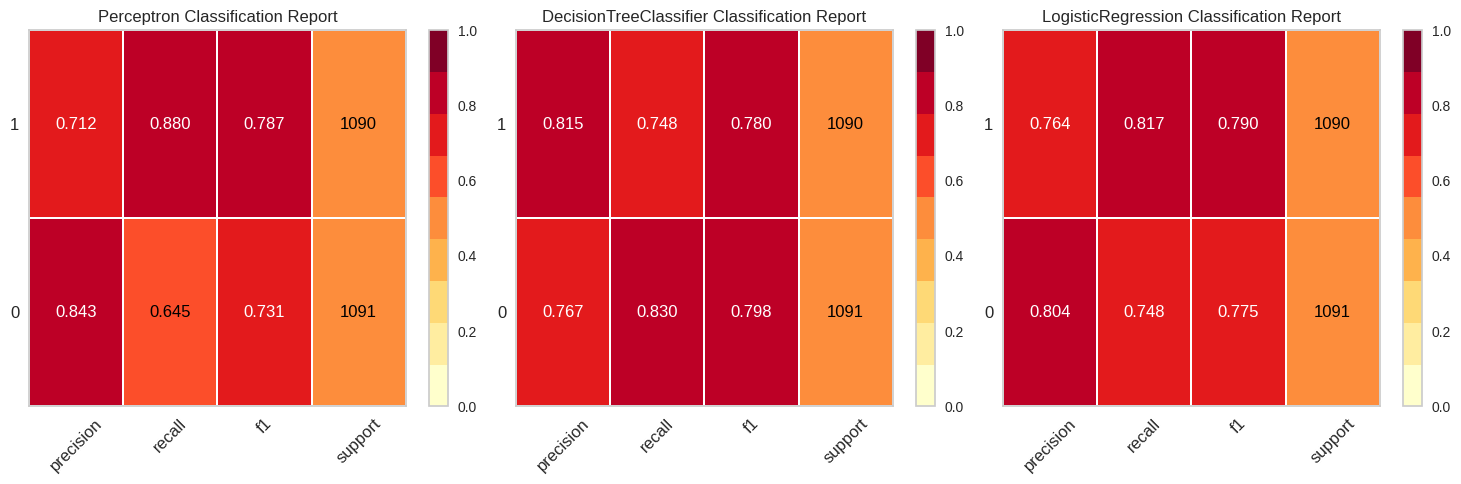

In [ ]:
#@title
fig, axe = plt.subplots(ncols=3,nrows=1,figsize=(15, 5))
fig.tight_layout(pad=8.0)
visualgrid = [ClassificationReport(classifiers[0], classes=classes, support=True,ax=axe[0]),
              ClassificationReport(classifiers[1], classes=classes, support=True,ax=axe[1]),
              ClassificationReport(classifiers[2], classes=classes, support=True,ax=axe[2])]
counter1 = 0
for viz in visualgrid:
  viz.fit(X_train, Y_train)
  viz.score(X_test, Y_test)
  viz.finalize()
fig.show()

## Class Prediction Error (CPE)

### Datos de entrenamiento

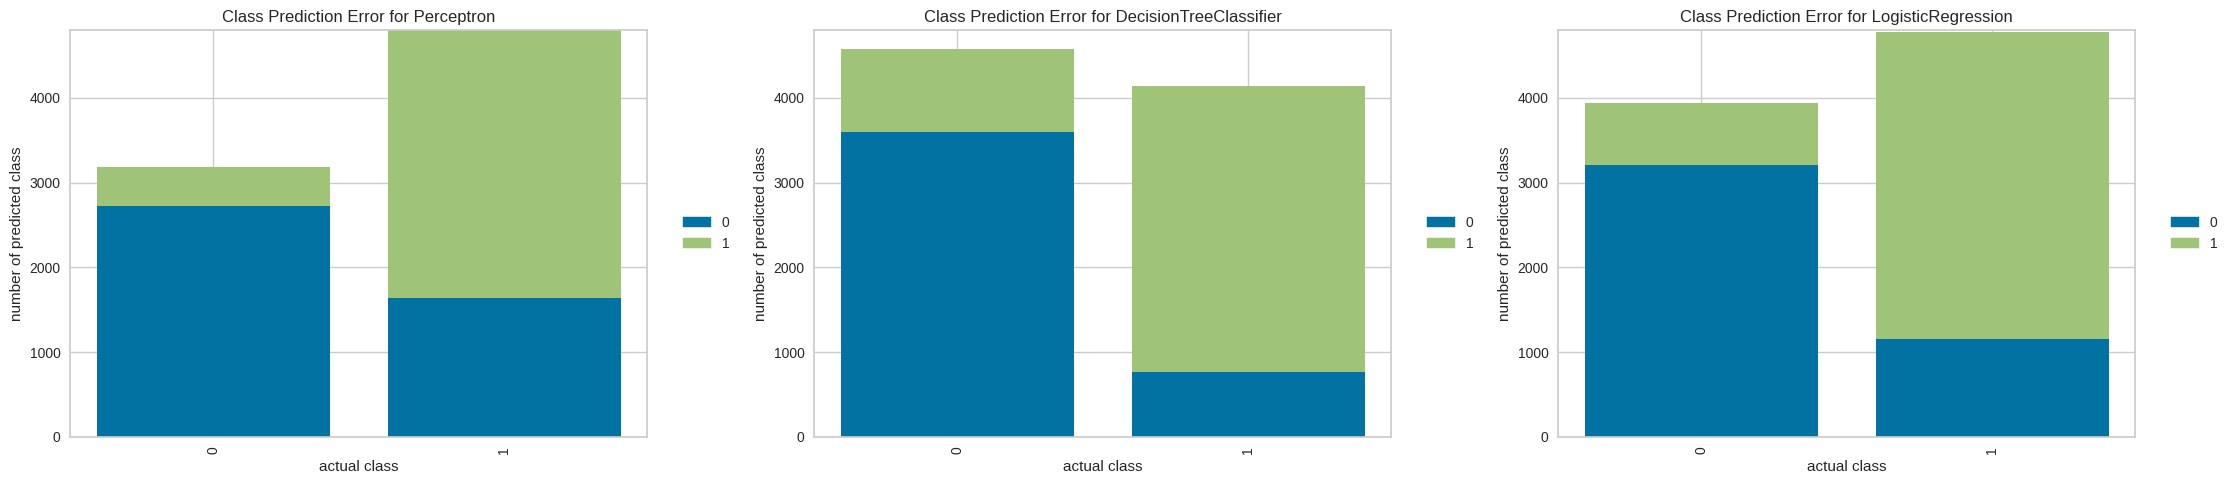

In [ ]:
fig, axe = plt.subplots(ncols=3,figsize=(25, 5))
fig.tight_layout(pad=8.0)
visualgrid = [ClassPredictionError(classifiers[0], classes=classes, ax=axe[0]),
              ClassPredictionError(classifiers[1], classes=classes, ax=axe[1]),
              ClassPredictionError(classifiers[2], classes=classes, ax=axe[2])]

for viz in visualgrid:
  viz.fit(X_train, Y_train)
  viz.score(X_train, Y_train)
  viz.finalize()

plt.show()

### Datos de validación

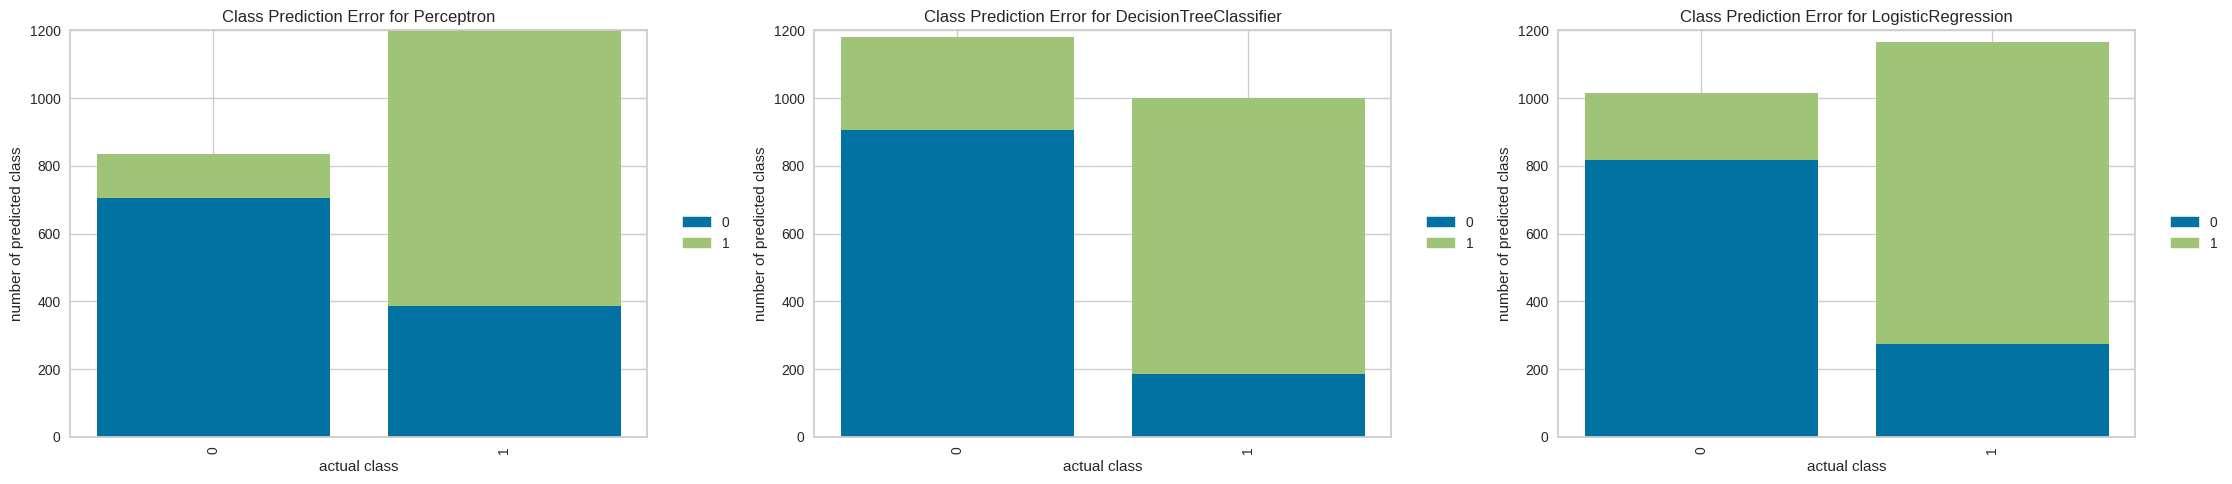

In [ ]:
fig, axe = plt.subplots(ncols=3,figsize=(25, 5))
fig.tight_layout(pad=8.0)
visualgrid = [ClassPredictionError(classifiers[0], classes=classes, ax=axe[0]),
              ClassPredictionError(classifiers[1], classes=classes, ax=axe[1]),
              ClassPredictionError(classifiers[2], classes=classes, ax=axe[2])]

for viz in visualgrid:
  viz.fit(X_train, Y_train)
  viz.score(X_test, Y_test)
  viz.finalize()

plt.show()